# Disaster Trends/Death Toll/Population Increase

__Author__:Hozumi Oshida
 
## Data Exploration & Data Analysis
The following are the visualized data: 
- Ranking of top disaster prone countries (Chart)
- Disaster trends in top 4 countries (Chart)
- Disaster trend in Indonesia (Chart)
- Death toll of natural disasters in Indonesia (Interactive Chart)
- Population change in Indonesia (Map)
- Location of floods in Indonesia (Interactive Map)

### Ranking of top disaster prone countries
#### Import geobandas and data
The first step is to import the geobandas and dataset of the global natural disasters from 1970 to 2020. I name the dataset "international."

In [1]:
import geopandas as gpd
international = gpd.read_file('disasters_international_50years.csv')

#### Get information about this dataset

Next, I use .info() to see the column name that I want to use for the next step. 

In [2]:
international.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Dis No                           14300 non-null  object  
 1   Year                             14300 non-null  object  
 2   Seq                              14300 non-null  object  
 3   Disaster Group                   14300 non-null  object  
 4   Disaster Subgroup                14300 non-null  object  
 5   Disaster Type                    14300 non-null  object  
 6   Disaster Subtype                 14300 non-null  object  
 7   Disaster Subsubtype              14300 non-null  object  
 8   Event Name                       14300 non-null  object  
 9   Entry Criteria                   14300 non-null  object  
 10  Country                          14300 non-null  object  
 11  ISO                              14300 non-null  object  
 

Now, I know the column listing the country name is called "Country".

#### Get valuese for a "country" column
In order to get the infromation about how many disasters have happened in each country for 50 years, the third step is to get values for a "country" column.
To do so, I put "Country" into "international []" and add ".value_counts()" in order to count how many disasters each country have. Then, I save the code as "country_count".

In [3]:
country_count = international['Country'].value_counts()
country_count

United States of America (the)                  915
China                                           895
India                                           644
Philippines (the)                               602
Indonesia                                       511
                                               ... 
United Arab Emirates (the)                        1
Saint Helena, Ascension and Tristan da Cunha      1
Saint Martin (French Part)                        1
Saint Barthélemy                                  1
Qatar                                             1
Name: Country, Length: 227, dtype: int64

#### Create a dataframe

The fourth step is to put country_count into a dataframe.

In [4]:
country_count = country_count.reset_index()
country_count

,index,Country
0,United States of America (the),915
1,China,895
2,India,644
3,Philippines (the),602
4,Indonesia,511
...,...,...
222,United Arab Emirates (the),1
223,"Saint Helena, Ascension and Tristan da Cunha",1
224,Saint Martin (French Part),1
225,Saint Barthélemy,1


Now, I am changing the column titles from "index" to "country" and from "Country" to "count".

In [5]:
country_count.columns.to_list()
country_count.columns = ['country', 'count']
country_count

,country,count
0,United States of America (the),915
1,China,895
2,India,644
3,Philippines (the),602
4,Indonesia,511
...,...,...
222,United Arab Emirates (the),1
223,"Saint Helena, Ascension and Tristan da Cunha",1
224,Saint Martin (French Part),1
225,Saint Barthélemy,1


#### Find top 10 high disaster risk countries

The country in the dataframe above is listed in the order of the higher volume of disaster count. Thus, if you use .head(10), you can see the top 10 countries with high disaster risk.

In [6]:
top10_country_count = country_count.head(10)
top10_country_count

,country,count
0,United States of America (the),915
1,China,895
2,India,644
3,Philippines (the),602
4,Indonesia,511
5,Bangladesh,315
6,Japan,265
7,Mexico,253
8,Viet Nam,237
9,Australia,233


#### Create a bar chart

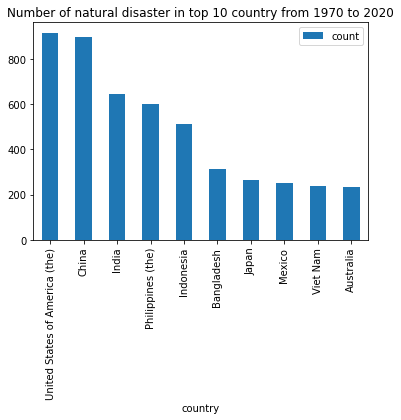

In [7]:
top10_country_count.plot.bar(x = 'country', y = 'count', title = 'Number of natural disaster in top 10 country from 1970 to 2020')

#### Analysis
- More than half of these countries are in Asia.
- Four of top five high disaster risk countries are Asian countries.
- Most of these countries are developing countries.

### Disaster trends in top 5 countries
Based on the information form the bar chart above, I use datasets of India, China, Philippines, and United States.

#### Import libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#### Import data and get information of the data
In this section, I use India as an example. After finishing this process, I will repeat it for other countries. 

As I did in the process of creating a bar chart, I use .info() to see the column names that I want to use in the next step.

In [9]:
india = pd.read_csv('cleaned data/india_disaster_cleaned.csv')
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           585 non-null    object 
 1   Year                             585 non-null    int64  
 2   Seq                              585 non-null    int64  
 3   Disaster Group                   585 non-null    object 
 4   Disaster Subgroup                585 non-null    object 
 5   Disaster Type                    585 non-null    object 
 6   Disaster Subtype                 464 non-null    object 
 7   Disaster Subsubtype              52 non-null     object 
 8   Event Name                       80 non-null     object 
 9   Entry Criteria                   580 non-null    object 
 10  Country                          585 non-null    object 
 11  ISO                              585 non-null    object 
 12  Region                

#### Create a new dataframe
After checking the column names, I use "df1" for the new dataframe with the column of year, disaster types, and disaster number. 

In [10]:
df1= india.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()
df1

,Year,Disaster Type,Dis No
0,1970,Earthquake,1
1,1970,Flood,2
2,1970,Storm,1
3,1971,Flood,3
4,1971,Storm,2
...,...,...,...
176,2019,Flood,5
177,2019,Storm,5
178,2020,Flood,4
179,2020,Landslide,2


#### Rename the column
Now, I rename the "Dis No" column to the "count" column.

In [11]:
df1 = india.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df1.head()

,Year,Disaster Type,count
0,1970,Earthquake,1
1,1970,Flood,2
2,1970,Storm,1
3,1971,Flood,3
4,1971,Storm,2


#### Create a plot

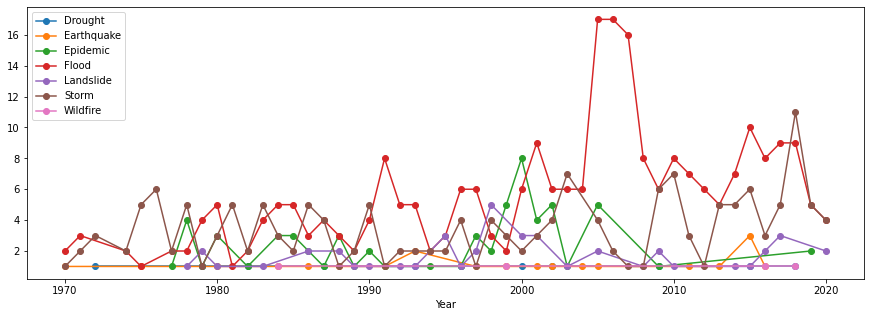

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df1.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')

#### Repeat this process for other top disaster prone countries
##### Philippines

In [13]:
philippines = pd.read_csv('cleaned data/philippines_disaster_cleaned.csv')
philippines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           575 non-null    object 
 1   Year                             575 non-null    int64  
 2   Seq                              575 non-null    int64  
 3   Disaster Group                   575 non-null    object 
 4   Disaster Subgroup                575 non-null    object 
 5   Disaster Type                    575 non-null    object 
 6   Disaster Subtype                 506 non-null    object 
 7   Disaster Subsubtype              5 non-null      object 
 8   Event Name                       342 non-null    object 
 9   Entry Criteria                   571 non-null    object 
 10  Country                          575 non-null    object 
 11  ISO                              575 non-null    object 
 12  Region                

In [14]:
philippines.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()

,Year,Disaster Type,Dis No
0,1970,Earthquake,1
1,1970,Storm,8
2,1971,Storm,4
3,1972,Flood,1
4,1972,Storm,3
...,...,...,...
153,2019,Flood,1
154,2019,Storm,7
155,2020,Earthquake,1
156,2020,Landslide,1


In [15]:
df2 = philippines.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df2.head()

,Year,Disaster Type,count
0,1970,Earthquake,1
1,1970,Storm,8
2,1971,Storm,4
3,1972,Flood,1
4,1972,Storm,3


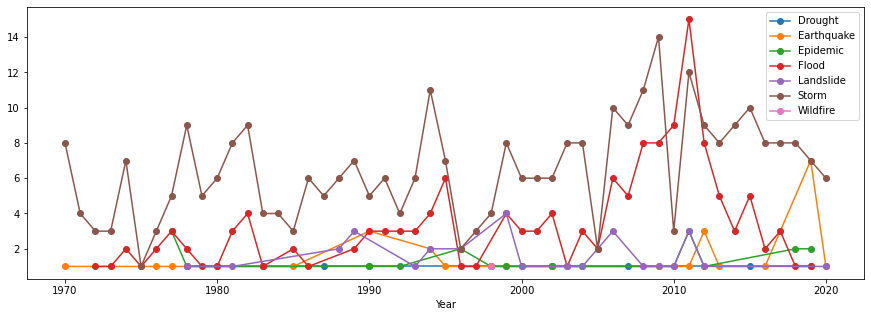

In [16]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df2.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')

##### China

In [17]:
china = pd.read_csv('cleaned data/china_disaster_cleaned.csv')
china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           873 non-null    object 
 1   Year                             873 non-null    int64  
 2   Seq                              873 non-null    int64  
 3   Disaster Group                   873 non-null    object 
 4   Disaster Subgroup                873 non-null    object 
 5   Disaster Type                    873 non-null    object 
 6   Disaster Subtype                 749 non-null    object 
 7   Disaster Subsubtype              102 non-null    object 
 8   Event Name                       163 non-null    object 
 9   Entry Criteria                   862 non-null    object 
 10  Country                          873 non-null    object 
 11  ISO                              873 non-null    object 
 12  Region                

In [18]:
china.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()

,Year,Disaster Type,Dis No
0,1970,Earthquake,1
1,1970,Storm,1
2,1973,Earthquake,1
3,1974,Earthquake,1
4,1975,Earthquake,1
...,...,...,...
195,2020,Earthquake,1
196,2020,Flood,5
197,2020,Landslide,1
198,2020,Storm,4


In [19]:
df3 = china.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df3.head()

,Year,Disaster Type,count
0,1970,Earthquake,1
1,1970,Storm,1
2,1973,Earthquake,1
3,1974,Earthquake,1
4,1975,Earthquake,1


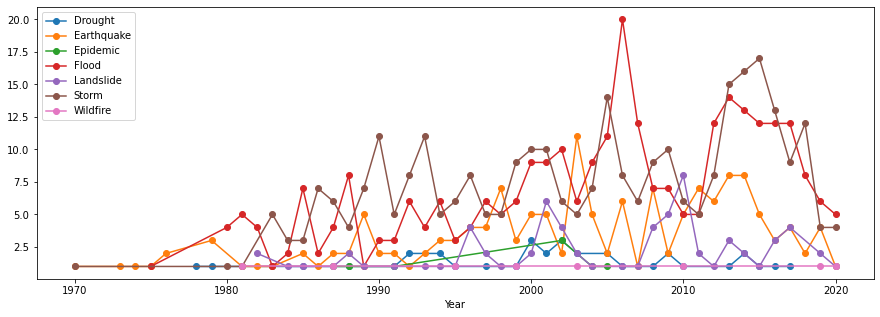

In [20]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df3.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')

##### United States

In [21]:
us = pd.read_csv('cleaned data/usa_disaster_cleaned.csv')
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           885 non-null    object 
 1   Year                             885 non-null    int64  
 2   Seq                              885 non-null    int64  
 3   Disaster Group                   885 non-null    object 
 4   Disaster Subgroup                885 non-null    object 
 5   Disaster Type                    885 non-null    object 
 6   Disaster Subtype                 698 non-null    object 
 7   Disaster Subsubtype              338 non-null    object 
 8   Event Name                       114 non-null    object 
 9   Entry Criteria                   883 non-null    object 
 10  Country                          885 non-null    object 
 11  ISO                              885 non-null    object 
 12  Region                

In [22]:
us.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()

,Year,Disaster Type,Dis No
0,1970,Storm,2
1,1970,Wildfire,1
2,1971,Earthquake,1
3,1971,Storm,2
4,1972,Flood,1
...,...,...,...
159,2019,Wildfire,2
160,2020,Drought,1
161,2020,Flood,2
162,2020,Storm,17


In [23]:
df4 = us.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df4.head()

,Year,Disaster Type,count
0,1970,Storm,2
1,1970,Wildfire,1
2,1971,Earthquake,1
3,1971,Storm,2
4,1972,Flood,1


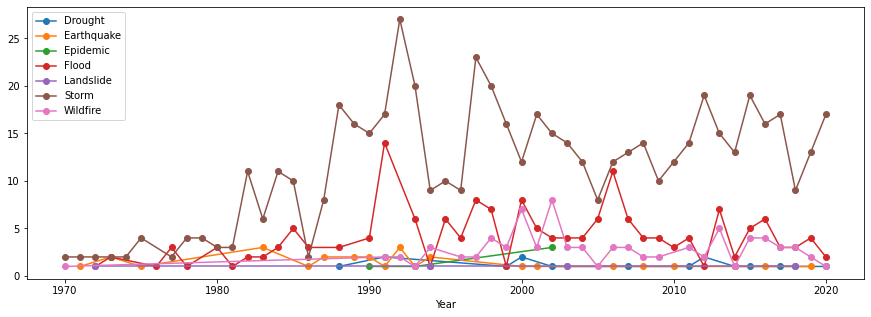

In [24]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df4.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')

#### Create subplots

In order to make it easier to compare all plot, I use subplots here.

Text(0.5, 1.0, 'Disaster Trend in United States')

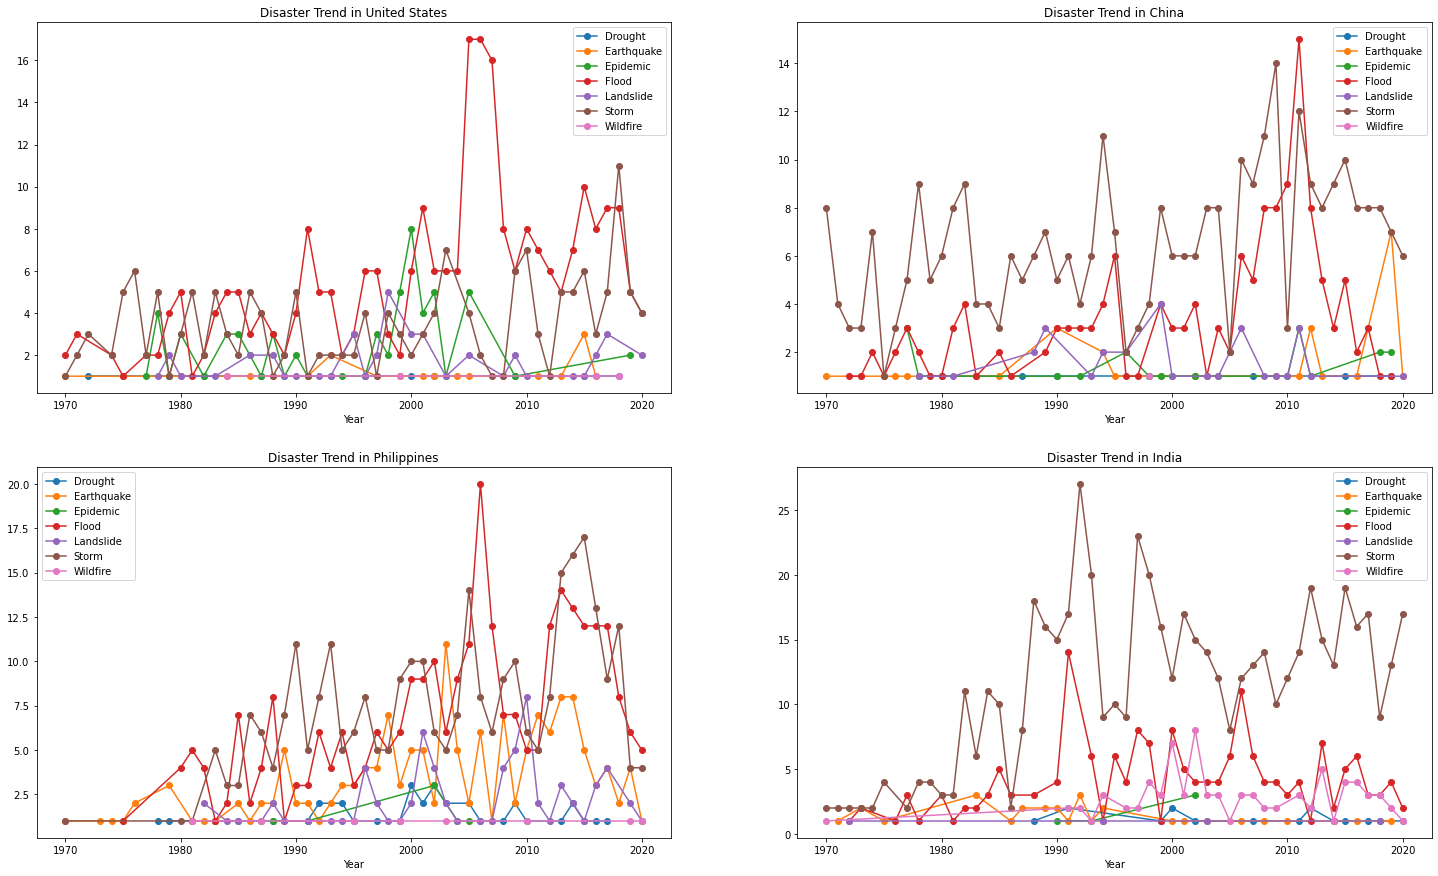

In [25]:
fig, ax = plt.subplots(2,2,figsize=(25,15))

for type, subdf in df1.groupby('Disaster Type'):
    subdf.plot(ax=ax[0,0], x='Year',y='count', label=type, marker='o')
ax[1,1].set_title('Disaster Trend in India')
    
for type, subdf in df2.groupby('Disaster Type'):
    subdf.plot(ax=ax[0,1], x='Year',y='count', label=type, marker='o')
ax[1,0].set_title('Disaster Trend in Philippines')
    
for type, subdf in df3.groupby('Disaster Type'):
    subdf.plot(ax=ax[1,0], x='Year',y='count', label=type, marker='o')
ax[0,1].set_title('Disaster Trend in China')

for type, subdf in df4.groupby('Disaster Type'):
    subdf.plot(ax=ax[1,1], x='Year',y='count', label=type, marker='o')
ax[0,0].set_title('Disaster Trend in United States')

Text(0.5, 1.0, 'Disaster Trend in United States')

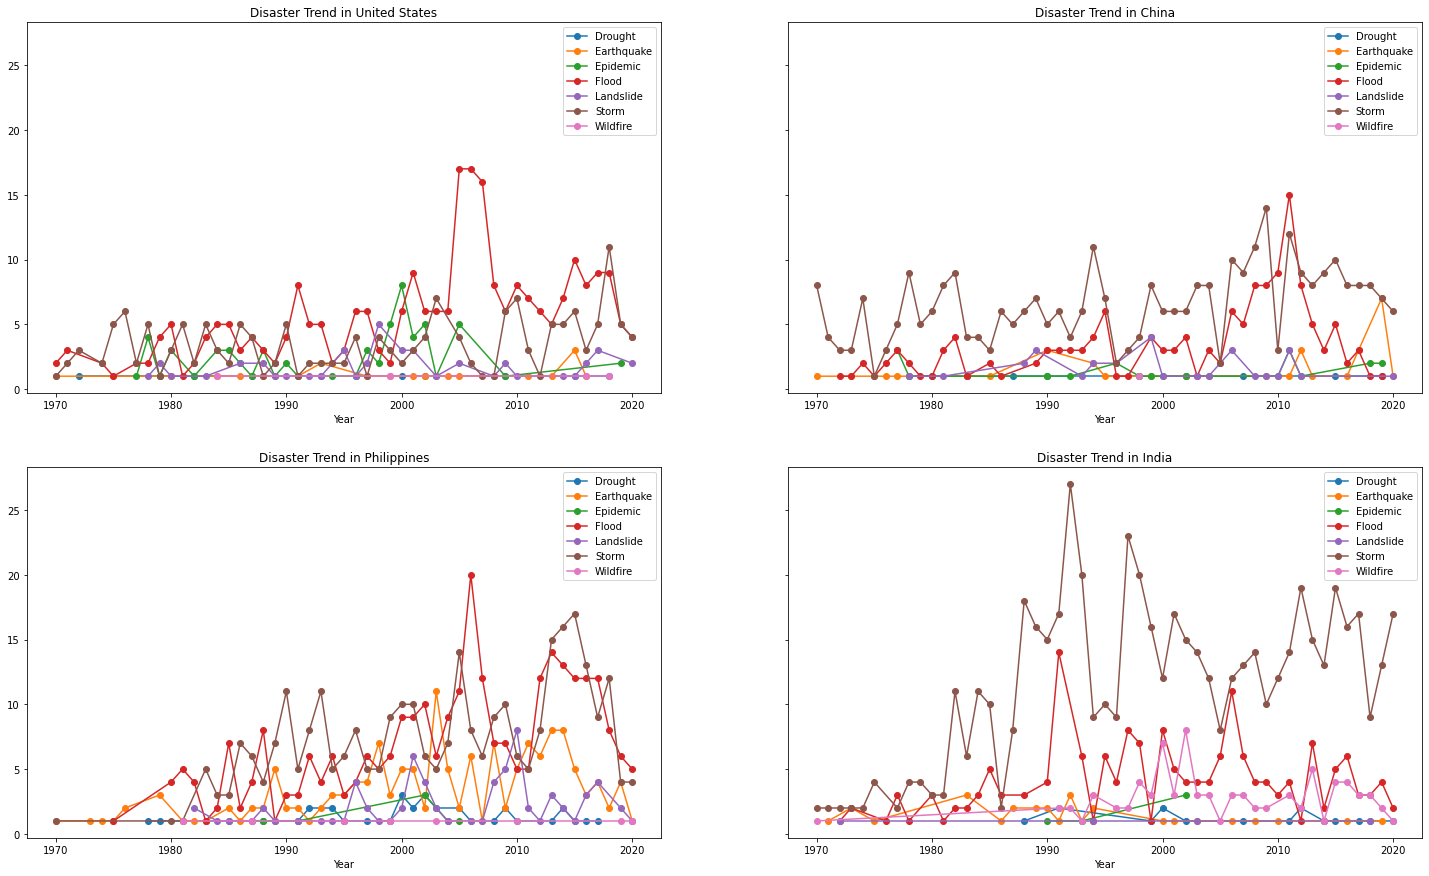

In [26]:
fig, ax = plt.subplots(2,2,figsize=(25,15),sharey=True)

for type, subdf in df1.groupby('Disaster Type'):
    subdf.plot(ax=ax[0,0], x='Year',y='count', label=type, marker='o')
ax[1,1].set_title('Disaster Trend in India')
    
for type, subdf in df2.groupby('Disaster Type'):
    subdf.plot(ax=ax[0,1], x='Year',y='count', label=type, marker='o')
ax[1,0].set_title('Disaster Trend in Philippines')
    
for type, subdf in df3.groupby('Disaster Type'):
    subdf.plot(ax=ax[1,0], x='Year',y='count', label=type, marker='o')
ax[0,1].set_title('Disaster Trend in China')

for type, subdf in df4.groupby('Disaster Type'):
    subdf.plot(ax=ax[1,1], x='Year',y='count', label=type, marker='o')
ax[0,0].set_title('Disaster Trend in United States')

#### Analysis

Regardless of the difference in locations, all of these four countries are experiencing the increase in climate disasters, like storm and flood. Therefore, these plots prove the increase in climate related disasters in the world. 

### Disaster trend in Indonesia

This is the same process as the previous section.
#### Import libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

#### Import data and get the information about the data

In [28]:
indonesia = pd.read_csv('cleaned data/indonesia_disaster_cleaned.csv')
indonesia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           462 non-null    object 
 1   Year                             462 non-null    int64  
 2   Seq                              462 non-null    int64  
 3   Disaster Group                   462 non-null    object 
 4   Disaster Subgroup                462 non-null    object 
 5   Disaster Type                    462 non-null    object 
 6   Disaster Subtype                 370 non-null    object 
 7   Disaster Subsubtype              2 non-null      object 
 8   Event Name                       27 non-null     object 
 9   Entry Criteria                   455 non-null    object 
 10  Country                          462 non-null    object 
 11  ISO                              462 non-null    object 
 12  Region                

#### Create a new dataframe

In [29]:
indonesia.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()

,Year,Disaster Type,Dis No
0,1970,Flood,1
1,1971,Earthquake,1
2,1972,Drought,1
3,1973,Storm,1
4,1974,Storm,1
...,...,...,...
160,2019,Landslide,2
161,2019,Wildfire,1
162,2020,Earthquake,1
163,2020,Flood,25


#### Rename the "Dis No" column to the "count" column

In [30]:
df = indonesia.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df.head()

,Year,Disaster Type,count
0,1970,Flood,1
1,1971,Earthquake,1
2,1972,Drought,1
3,1973,Storm,1
4,1974,Storm,1


#### Create a plot

Text(0.5, 1.0, 'Disaster Trend in Indonesia')

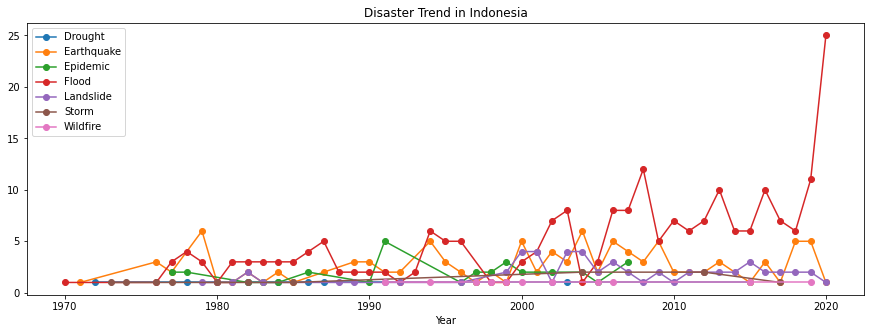

In [31]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')
ax.set_title('Disaster Trend in Indonesia')

#### Analysis

First, the freaquencey of **flood** has been drastically increasing, especially this past 10 years. One of the reasons for this increase would be climate change. Rising temperature make more water vapor which contributes to more cloud formation. Therefore, climate change can trigger flood with extreme precipitation.

Second, there was an increase in **earthquake** around 2000. In fact, there was Indian Ocean earthquake in 2004. Therefore, this increase in earthquake from 1980 to 2000 could be considered to be a foreshock of the earthquake in 2004. Along with the trend of earthquake, trend of **landslide** is very slimiar to that of earthquake. Thus, those landlide might be mainly triggered by the shake casued by an earthquake.

### Death toll of natural disasters in Indonesia

__The reason why the chart I presented in the presentation was low__

In the presentation, I showed the bar chart that indicates a gradual increase in death toll by flood. After the presentation, I reviewed my chart to see why the count of death toll was unrealistically low. Then, I recognized that I needed to group by year, disaster type, and total death to successfully get a death toll for each disaster type. So the code should be: 

- __indonesia.groupby(['Year','Disaster Type', 'Total Deaths'])['Dis No'].count().reset_index(name='count')__

However, for the chart I presented in the presentation, I grouped by year and disaster type, so the code I used was:

- __indonesia.groupby(['Year','Disaster Type'])['Total Deaths'].count().reset_index(name='count')__

This is why the death toll on the previous chart was really low because it counted not the number of people who died, but the number of incidents that caused any death.

Therefore, __the chart I am creating here looks different from the one I showed in the presentation.__

#### Import libraries

In [32]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd

#### Import data and get the information 

In [33]:
indonesia = pd.read_csv('cleaned data/indonesia_disaster_cleaned.csv')
indonesia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           462 non-null    object 
 1   Year                             462 non-null    int64  
 2   Seq                              462 non-null    int64  
 3   Disaster Group                   462 non-null    object 
 4   Disaster Subgroup                462 non-null    object 
 5   Disaster Type                    462 non-null    object 
 6   Disaster Subtype                 370 non-null    object 
 7   Disaster Subsubtype              2 non-null      object 
 8   Event Name                       27 non-null     object 
 9   Entry Criteria                   455 non-null    object 
 10  Country                          462 non-null    object 
 11  ISO                              462 non-null    object 
 12  Region                

#### Create a dataframe 
In this dataframe, I want to group a data by year, disaster types, and total deaths and get a death toll for each.
Also, I rename the "Dis No" column to the "count" column.

In [34]:
indonesia_flat=indonesia.groupby(['Year','Disaster Type', 'Total Deaths'])['Dis No'].count().reset_index(name='count')
indonesia_flat.head()

,Year,Disaster Type,Total Deaths,count
0,1970,Flood,82.0,1
1,1971,Earthquake,1.0,1
2,1973,Storm,1650.0,1
3,1974,Storm,10.0,1
4,1976,Earthquake,133.0,1


#### Create a bar chart
Color the chart by disaster type

In [36]:
px.bar(indonesia_flat,
      x='Year',
      y='Total Deaths',
       color='Disaster Type',
       log_y=True
      )

#### Analysis
- Earthquake is the number one cause of disaster-related death.
- Since the 2004 Indian Ocean earthquake and tsunami happened in Sumatra, Indonesia in 2004, there is a significant spike in death toll. 
- Some other spikes of death toll is caused by an epidemic in 1998 and 2004. 
- Based on my research, the one in 1998 is considered to be the dengue outbreak.
- For the epidemic in 2004, I think it might be related to the earthquake in Sumatra. This is because there is a risk of getting various infectious disease, including waterborne disase and soil-transmitted helminth infections, while having difficulty in the access to clearn water, nutritious food, and hygienic environment.
- Although there are no spikes, flood and landslide consistantly brings death toll.
- The average death toll of both flood and landsilde seems to have increased since 2000.

### Population change in Indonesia

#### Import libraries

In [37]:
%matplotlib inline
import pandas as pd
import contextily as cx
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

#### Import geographical data

In [38]:
db = gpd.read_file('Untitled Folder')
db.head()

,Shape_Leng,Shape_Area,AREA_NAME,GEO_CONCAT,GEO_MATCH,CNTRY_NAME,ADM1_NAME,ADM_LEVEL,USCBCMNT,GENC_CODE,FIPS_CODE,NSO_CODE,geometry
0,26.908954,4.630154,ACEH,INDONESIA_ACEH,IDN_01,INDONESIA,ACEH,1,None,ID-AC,ID01,1100,"MULTIPOLYGON (((97.39711 2.03835, 97.39588 2.0..."
1,5.666217,0.458949,BALI,INDONESIA_BALI,IDN_17,INDONESIA,BALI,1,None,ID-BA,ID02,5100,"MULTIPOLYGON (((115.58135 -8.81723, 115.58116 ..."
2,8.901867,0.764512,BANTEN,INDONESIA_BANTEN,IDN_16,INDONESIA,BANTEN,1,None,ID-BT,ID33,3600,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,11.203636,1.612857,BENGKULU,INDONESIA_BENGKULU,IDN_07,INDONESIA,BENGKULU,1,None,ID-BE,ID03,1700,"MULTIPOLYGON (((102.16187 -5.27606, 102.18657 ..."
4,10.836366,0.978359,GORONTALO,INDONESIA_GORONTALO,IDN_28,INDONESIA,GORONTALO,1,None,ID-GO,ID34,7500,"MULTIPOLYGON (((122.12154 0.40535, 122.12153 0..."


#### Import population data

In [39]:
totalpop = pd.read_csv('Indonesia Census Data new.csv')
totalpop.head()

,AREA_NAME,GEO_CONCAT,GEO_MATCH,CNTRY_NAME,ADM1_NAME,ADM2_NAME,ADM3_NAME,ADM4_NAME,ADM_LEVEL,USCBCMNT,...,B1519_2018,B2024_2018,B2529_2018,B3034_2018,B3539_2018,B4044_2018,B4549_2018,B5054_2018,B5559_2018,B6064_2018
0,ACEH,INDONESIA_ACEH,IDN_01,INDONESIA,ACEH,NaN,NaN,NaN,1,NaN,...,"462,661","459,906","378,501","346,793","336,592","314,913","277,268","220,264","188,516","159,918"
1,SUMATERA UTARA,INDONESIA_SUMATERA UTARA,IDN_02,INDONESIA,SUMATERA UTARA,NaN,NaN,NaN,1,NaN,...,"1,336,370","1,184,146","1,014,507","950,203","941,761","960,147","877,281","737,190","626,252","454,864"
2,SUMATERA BARAT,INDONESIA_SUMATERA BARAT,IDN_03,INDONESIA,SUMATERA BARAT,NaN,NaN,NaN,1,NaN,...,"461,932","400,935","352,107","347,056","345,960","348,694","334,256","304,644","276,593","200,746"
3,RIAU,INDONESIA_RIAU,IDN_04,INDONESIA,RIAU,NaN,NaN,NaN,1,Part split off to form Kepulauan Riau Province,...,"669,065","709,350","662,804","626,649","585,193","534,393","433,875","323,125","252,671","186,409"
4,JAMBI,INDONESIA_JAMBI,IDN_05,INDONESIA,JAMBI,NaN,NaN,NaN,1,NaN,...,"322,176","339,987","316,726","300,076","282,639","266,492","234,055","187,177","149,863","117,862"


#### Remove columns
Due to the large volume of data, I use the population data only from 2000, 2005, 2010, and 2015.

In [40]:
columns_to_keep = ['AREA_NAME',
 'BTOTL_2000',
 'BTOTL_2005',
 'BTOTL_2010',
 'BTOTL_2015']
totalpop = totalpop[columns_to_keep]
totalpop.head()

,AREA_NAME,BTOTL_2000,BTOTL_2005,BTOTL_2010,BTOTL_2015
0,ACEH,"4,268,536","4,453,822","4,600,362","4,695,790"
1,SUMATERA UTARA,"12,065,208","12,734,303","13,291,646","13,695,110"
2,SUMATERA BARAT,"4,447,454","4,726,043","4,963,179","5,142,031"
3,RIAU,"3,938,013","4,753,652","5,690,629","6,743,907"
4,JAMBI,"2,524,066","2,843,530","3,171,421","3,495,191"


#### Combine the dataset

I need to combine the datasets because the one have population data and the other only have geographical data.

In [41]:
db.join(totalpop.set_index("AREA_NAME"), on="AREA_NAME")

,Shape_Leng,Shape_Area,AREA_NAME,GEO_CONCAT,GEO_MATCH,CNTRY_NAME,ADM1_NAME,ADM_LEVEL,USCBCMNT,GENC_CODE,FIPS_CODE,NSO_CODE,geometry,BTOTL_2000,BTOTL_2005,BTOTL_2010,BTOTL_2015
0,26.908954,4.630154,ACEH,INDONESIA_ACEH,IDN_01,INDONESIA,ACEH,1,None,ID-AC,ID01,1100,"MULTIPOLYGON (((97.39711 2.03835, 97.39588 2.0...","4,268,536","4,453,822","4,600,362","4,695,790"
1,5.666217,0.458949,BALI,INDONESIA_BALI,IDN_17,INDONESIA,BALI,1,None,ID-BA,ID02,5100,"MULTIPOLYGON (((115.58135 -8.81723, 115.58116 ...","3,299,793","3,641,682","3,988,626","4,329,057"
2,8.901867,0.764512,BANTEN,INDONESIA_BANTEN,IDN_16,INDONESIA,BANTEN,1,None,ID-BT,ID33,3600,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...","8,490,071","9,670,165","10,907,545","12,162,184"
3,11.203636,1.612857,BENGKULU,INDONESIA_BENGKULU,IDN_07,INDONESIA,BENGKULU,1,None,ID-BE,ID03,1700,"MULTIPOLYGON (((102.16187 -5.27606, 102.18657 ...","1,637,883","1,706,324","1,755,737","1,781,161"
4,10.836366,0.978359,GORONTALO,INDONESIA_GORONTALO,IDN_28,INDONESIA,GORONTALO,1,None,ID-GO,ID34,7500,"MULTIPOLYGON (((122.12154 0.40535, 122.12153 0...","870,497","968,831","1,066,417","1,158,895"
5,3.111914,0.053398,JAKARTA,INDONESIA_JAKARTA,IDN_11,INDONESIA,JAKARTA,1,None,ID-JK,ID04,3100,"MULTIPOLYGON (((106.72568 -6.08938, 106.72590 ...","8,752,204","9,336,447","9,839,100","10,225,047"
6,12.020288,3.979657,JAMBI,INDONESIA_JAMBI,IDN_05,INDONESIA,JAMBI,1,None,ID-JA,ID05,1500,"MULTIPOLYGON (((104.40714 -0.86371, 104.40590 ...","2,524,066","2,843,530","3,171,421","3,495,191"
7,11.762910,3.032266,JAWA BARAT,INDONESIA_JAWA BARAT,IDN_12,INDONESIA,JAWA BARAT,1,None,ID-JB,ID30,3200,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ...","37,457,683","40,837,354","44,120,327","47,160,793"
8,15.458152,2.819734,JAWA TENGAH,INDONESIA_JAWA TENGAH,IDN_13,INDONESIA,JAWA TENGAH,1,None,ID-JT,ID07,3300,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ...","32,424,197","32,970,663","33,121,462","32,813,249"
9,32.934628,3.934116,JAWA TIMUR,INDONESIA_JAWA TIMUR,IDN_15,INDONESIA,JAWA TIMUR,1,None,ID-JI,ID08,3500,"MULTIPOLYGON (((114.20384 -8.65725, 114.20366 ...","36,452,667","37,606,017","38,346,794","38,583,174"


In [42]:
db=db.join(totalpop.set_index("AREA_NAME"), on="AREA_NAME")

#### Change data types 
1. use .info() to see the datatype to successfully map the data

In [43]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Shape_Leng  33 non-null     float64 
 1   Shape_Area  33 non-null     float64 
 2   AREA_NAME   33 non-null     object  
 3   GEO_CONCAT  33 non-null     object  
 4   GEO_MATCH   33 non-null     object  
 5   CNTRY_NAME  33 non-null     object  
 6   ADM1_NAME   33 non-null     object  
 7   ADM_LEVEL   33 non-null     object  
 8   USCBCMNT    6 non-null      object  
 9   GENC_CODE   33 non-null     object  
 10  FIPS_CODE   33 non-null     object  
 11  NSO_CODE    33 non-null     object  
 12  geometry    33 non-null     geometry
 13  BTOTL_2000  33 non-null     object  
 14  BTOTL_2005  33 non-null     object  
 15  BTOTL_2010  33 non-null     object  
 16  BTOTL_2015  33 non-null     object  
dtypes: float64(2), geometry(1), object(14)
memory usage: 4.5+ KB


2. According to the information above, the data types of population total from 2000, 2005, 2010, and 2015 are object, not float. The following code allows us why the data type is seen as object.

In [44]:
db["BTOTL_2000"]

0      4,268,536
1      3,299,793
2      8,490,071
3      1,637,883
4        870,497
5      8,752,204
6      2,524,066
7     37,457,683
8     32,424,197
9     36,452,667
10     3,914,151
11     3,120,181
12     1,888,444
13     2,562,081
14       942,779
15     1,048,306
16     6,971,879
17     1,205,756
18       702,399
19     4,016,533
20     3,993,391
21     1,743,281
22       598,849
23     3,938,013
24       905,979
25     7,274,390
26     2,180,170
27     1,862,544
28     2,069,222
29     4,447,454
30     7,190,078
31    12,065,208
32     3,271,890
Name: BTOTL_2000, dtype: object

3. In order to change the data type from object to float, I need to eliminate "," and replace it with nothing.

In [45]:
db["BTOTL_2000"]=db["BTOTL_2000"].str.replace(",","").astype(float)
db["BTOTL_2005"]=db["BTOTL_2005"].str.replace(",","").astype(float)
db["BTOTL_2010"]=db["BTOTL_2010"].str.replace(",","").astype(float)
db["BTOTL_2015"]=db["BTOTL_2015"].str.replace(",","").astype(float)

#### Create maps

Text(0.5, 1.0, '2015 Total Population')

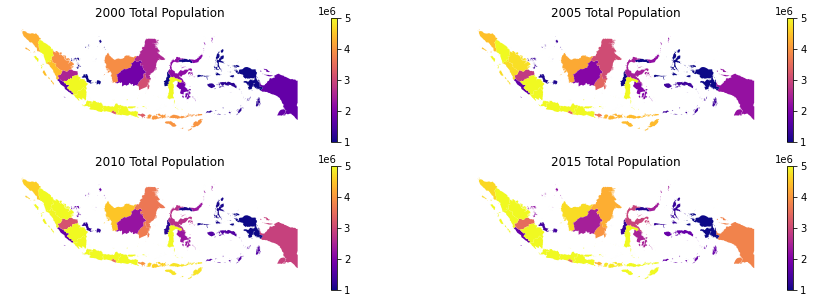

In [46]:
fig, ax = plt.subplots(2,2,figsize=(15,5))

db.plot(ax=ax[0,0],column="BTOTL_2000", cmap="plasma", legend=True, vmin=1000000,vmax=5000000)
ax[0,0].axis('off')
ax[0,0].set_title('2000 Total Population')

db.plot(ax=ax[0,1],column="BTOTL_2005", cmap="plasma", legend=True, vmin=1000000,vmax=5000000)
ax[0,1].axis('off')
ax[0,1].set_title('2005 Total Population')

db.plot(ax=ax[1,0],column="BTOTL_2010", cmap="plasma", legend=True, vmin=1000000,vmax=5000000)
ax[1,0].axis('off')
ax[1,0].set_title('2010 Total Population')

db.plot(ax=ax[1,1],column="BTOTL_2015", cmap="plasma", legend=True, vmin=1000000,vmax=5000000)
ax[1,1].axis('off')
ax[1,1].set_title('2015 Total Population')

#### Analysis

These maps allow us to get the general idea of how population has rapidly increased in vairous areas in Indonesia, including West Sumatra and North kalimantan. 